In [1]:
import numpy as np

X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))

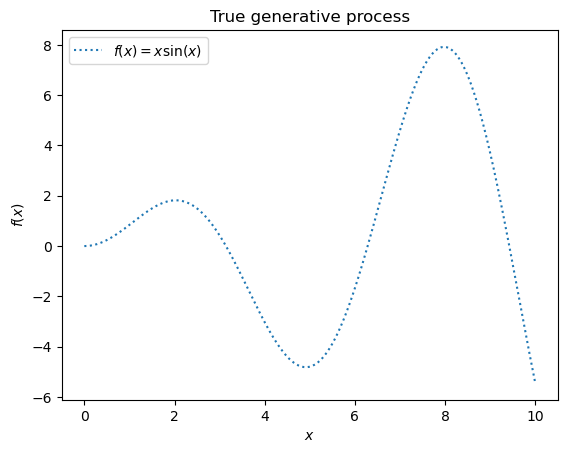

In [2]:
import matplotlib.pyplot as plt

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")

In [3]:
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

5.02**2 * RBF(length_scale=1.43)

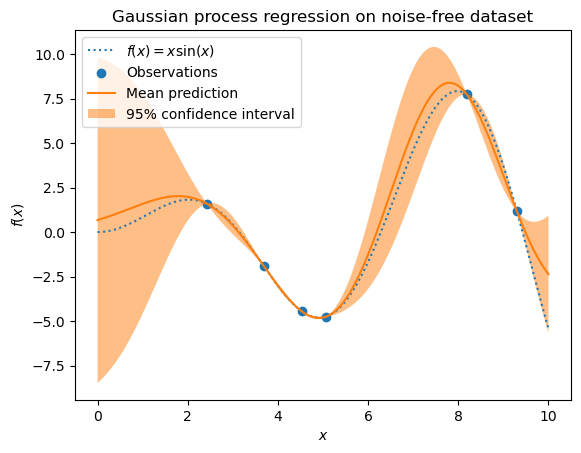

In [5]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

In [6]:
noise_std = 0.75
y_train_noisy = y_train + rng.normal(loc=0.0, scale=noise_std, size=y_train.shape)

In [7]:
gaussian_process = GaussianProcessRegressor(
    kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9
)
gaussian_process.fit(X_train, y_train_noisy)
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

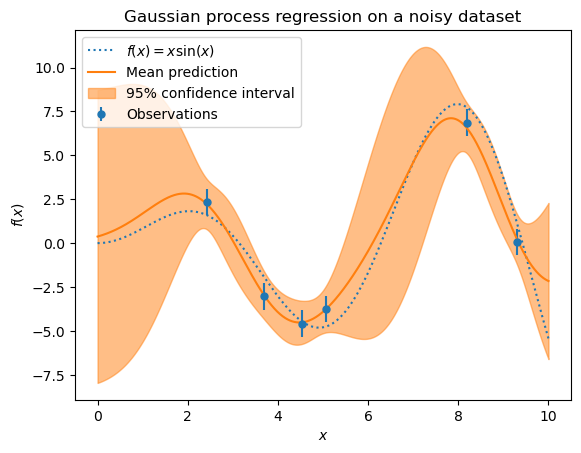

In [8]:
plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.errorbar(
    X_train,
    y_train_noisy,
    noise_std,
    linestyle="None",
    color="tab:blue",
    marker=".",
    markersize=10,
    label="Observations",
)
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    color="tab:orange",
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on a noisy dataset")

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process.kernels import RBF
from scipy.stats import multivariate_normal as mvn
import matplotlib
inv = np.linalg.inv


font = {"size": 25}
matplotlib.rc("font", **font)
matplotlib.rcParams["text.usetex"] = True

# Set up kernel
k = RBF()

# Draw samples from GP
n = 10
sigma2 = .05
x = np.random.uniform(low=-3, high=3, size=n)
Kxx = k(np.expand_dims(x, 1), np.expand_dims(x, 1))
y = mvn.rvs(mean=np.zeros(n), cov=Kxx + sigma2 * np.eye(n))

plt.figure(figsize=(10, 5))
plt.scatter(x, y, c="blue", label="Data")
# plt.xlabel(r"$x$")
# plt.ylabel(r"$y$")
# plt.legend(prop={'size': 15})
# # plt.tight_layout()
# plt.show()
# plt.savefig("./out/inducing_points_data.png")
# plt.close()

# # Get predictions from GP
# n_test = 100
# xstar = np.linspace(-3, 3, n_test)
# Kxstarx = k(np.expand_dims(xstar, 1), np.expand_dims(x, 1))
# Kxstarxstar = k(np.expand_dims(xstar, 1), np.expand_dims(xstar, 1))
# ystar_mean = Kxstarx @ inv(Kxx + sigma2 * np.eye(n)) @ y
# ystar_cov = Kxstarxstar - Kxstarx @ inv(Kxx + sigma2 * np.eye(n)) @ Kxstarx.T + sigma2
# band_width = 2 * np.sqrt(np.diag(ystar_cov))
# lower = ystar_mean - band_width
# upper = ystar_mean + band_width

# plt.figure(figsize=(10, 5))
# plt.scatter(x, y, c="blue", label="Data")
# plt.plot(xstar, ystar_mean, c="red", alpha=0.5, label="Predicted mean")
# plt.fill_between(xstar, lower, upper, alpha=0.5)
# plt.xlabel(r"$x$")
# plt.ylabel(r"$y$")
# plt.legend(prop={'size': 15})
# plt.tight_layout()
# plt.show()
# # plt.savefig("./out/inducing_points_gp_predictions.png")
# # plt.close()


# # Create inducing points
# m = 2
# xbar = np.random.uniform(low=-3, high=3, size=m)

# # Get predictions using inducing points
# Kxbarxbar = k(np.expand_dims(xbar, 1), np.expand_dims(xbar, 1))
# Kxbarx = k(np.expand_dims(xbar, 1), np.expand_dims(x, 1))
# Kxstarxbar = k(np.expand_dims(xstar, 1), np.expand_dims(xbar, 1))
# Lambda = np.zeros(n) #np.diag(np.diag(Kxx) - np.diag(Kxbarx.T @ inv(Kxbarxbar) @ Kxbarx))
# for ii in range(n):
#   Lambda[ii] = Kxx[ii, ii] - Kxbarx.T[ii, :] @ inv(Kxbarxbar) @ Kxbarx[:, ii]
# Lambda = np.diag(Lambda)
# assert np.all(Lambda >= 0)
# Qm = Kxbarxbar + Kxbarx @ inv(Lambda + sigma2 * np.eye(n)) @ Kxbarx.T
# ystar_mean = np.zeros(n_test)
# ystar_vars = np.zeros(n_test)
# for ii in range(n_test):
#   ystar_mean[ii] = Kxstarxbar[ii, :] @ inv(Qm) @ Kxbarx @ inv(Lambda + sigma2 * np.eye(n)) @ y
#   ystar_vars[ii] = Kxstarxstar[ii, ii] - Kxstarxbar[ii, :] @ (inv(Kxbarxbar) - inv(Qm)) @ Kxstarxbar.T[:, ii] + sigma2




# band_width = 2 * np.sqrt(ystar_vars)
# lower = ystar_mean - band_width
# upper = ystar_mean + band_width

# plt.figure(figsize=(10, 5))
# plt.scatter(x, y, c="blue", label="Data")
# for ii in range(m):
#   plt.axvline(xbar[ii], alpha=0.4, linestyle="--", c="green")
# plt.plot(xstar, ystar_mean, c="red", alpha=0.5, label="Predicted mean")
# plt.fill_between(xstar, lower, upper, alpha=0.5)
# plt.xlabel(r"$x$")
# plt.ylabel(r"$y$")
# plt.legend(prop={'size': 15})
# plt.tight_layout()
# plt.show()
# # plt.savefig("./out/inducing_points_ip_predictions.png")
# # plt.close()

Error in callback <function _draw_all_if_interactive at 0x0000024D44446CA0> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1000x500 with 1 Axes>